### House sales price prediction using regression

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Step 1 : Data Ingestion

In [2]:
import pandas as pd
df = pd.read_csv("training_set.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Target Feature - Sales Price

### Step 2 : Basic data quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
m = df.isna().sum()
m[m>0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

### Step 3 : Saperate X and Y(SalePrice)

In [6]:
X = df.drop(columns=["Id", "SalePrice"])
Y = df[["SalePrice"]]

In [7]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [8]:
Y.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


<Axes: xlabel='SalePrice', ylabel='Count'>

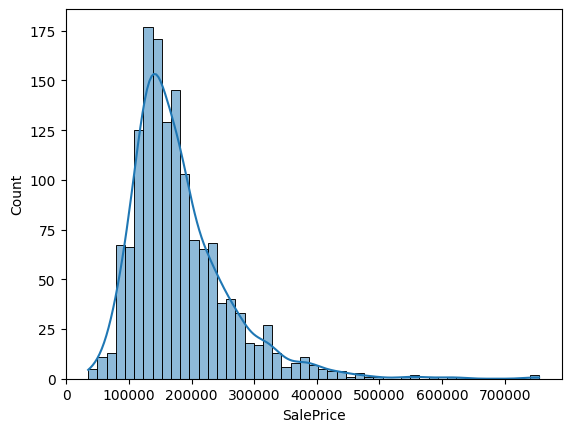

In [9]:
import seaborn as sns
sns.histplot(data=df, x="SalePrice", kde=True)

### Step 4 : Apply preprocessing on X for Feature selection

In [10]:
X.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 79, dtype: object

In [11]:
cat = list(X.columns[X.dtypes == "object"])
con = list(X.columns[X.dtypes != "object"])

In [12]:
cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [13]:
con

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [15]:
con_pipe1 = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

In [16]:
cat_pipe1 = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="Not_avail"),
    OrdinalEncoder()
)

In [17]:
pre1 = ColumnTransformer(
    [
        ("con", con_pipe1, con),
        ("cat", cat_pipe1, cat)
    ]
).set_output(transform="pandas")

In [18]:
X_pre1 = pre1.fit_transform(X)
X_pre1.head()

,con__MSSubClass,con__LotFrontage,con__LotArea,con__OverallQual,con__OverallCond,con__YearBuilt,con__YearRemodAdd,con__MasVnrArea,con__BsmtFinSF1,con__BsmtFinSF2,...,cat__GarageType,cat__GarageFinish,cat__GarageQual,cat__GarageCond,cat__PavedDrive,cat__PoolQC,cat__Fence,cat__MiscFeature,cat__SaleType,cat__SaleCondition
0,0.073375,-0.220875,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.288653,...,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0
1,-0.872563,0.460320,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,-0.288653,...,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0
2,0.073375,-0.084636,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,-0.288653,...,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0
3,0.309859,-0.447940,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,...,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,0.0
4,0.073375,0.641972,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,-0.288653,...,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

In [20]:
model = LinearRegression()
sel = SequentialFeatureSelector(model, n_features_to_select="auto", direction="backward", n_jobs=-1)
sel.fit(X_pre1, Y)
sel_col = sel.get_feature_names_out()
sel_col

array(['con__MSSubClass', 'con__LotArea', 'con__OverallQual',
       'con__OverallCond', 'con__YearBuilt', 'con__MasVnrArea',
       'con__BsmtFinSF1', 'con__BsmtFinSF2', 'con__BsmtUnfSF',
       'con__TotalBsmtSF', 'con__1stFlrSF', 'con__2ndFlrSF',
       'con__LowQualFinSF', 'con__GrLivArea', 'con__BsmtFullBath',
       'con__Fireplaces', 'con__GarageCars', 'con__WoodDeckSF',
       'con__ScreenPorch', 'con__PoolArea', 'con__YrSold',
       'cat__LandContour', 'cat__Utilities', 'cat__Neighborhood',
       'cat__BldgType', 'cat__HouseStyle', 'cat__RoofMatl',
       'cat__Exterior1st', 'cat__MasVnrType', 'cat__ExterQual',
       'cat__BsmtQual', 'cat__BsmtCond', 'cat__BsmtExposure',
       'cat__HeatingQC', 'cat__KitchenQual', 'cat__Functional',
       'cat__FireplaceQu', 'cat__GarageFinish', 'cat__GarageCond',
       'cat__MiscFeature'], dtype=object)

In [21]:
len(sel_col)

40

In [22]:
imp_col = [col.split("__")[1] for col in sel_col]
imp_col

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'ScreenPorch',
 'PoolArea',
 'YrSold',
 'LandContour',
 'Utilities',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'RoofMatl',
 'Exterior1st',
 'MasVnrType',
 'ExterQual',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'HeatingQC',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageFinish',
 'GarageCond',
 'MiscFeature']

In [23]:
X_imp = X[imp_col]
X_imp

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,BsmtQual,BsmtCond,BsmtExposure,HeatingQC,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageCond,MiscFeature
0,60,8450,7,5,2003,196.0,706,0,150,856,...,Gd,TA,No,Ex,Gd,Typ,NaN,RFn,TA,NaN
1,20,9600,6,8,1976,0.0,978,0,284,1262,...,Gd,TA,Gd,Ex,TA,Typ,TA,RFn,TA,NaN
2,60,11250,7,5,2001,162.0,486,0,434,920,...,Gd,TA,Mn,Ex,Gd,Typ,TA,RFn,TA,NaN
3,70,9550,7,5,1915,0.0,216,0,540,756,...,TA,Gd,No,Gd,Gd,Typ,Gd,Unf,TA,NaN
4,60,14260,8,5,2000,350.0,655,0,490,1145,...,Gd,TA,Av,Ex,Gd,Typ,TA,RFn,TA,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,0.0,0,0,953,953,...,Gd,TA,No,Ex,TA,Typ,TA,RFn,TA,NaN
1456,20,13175,6,6,1978,119.0,790,163,589,1542,...,Gd,TA,No,TA,TA,Min1,TA,Unf,TA,NaN
1457,70,9042,7,9,1941,0.0,275,0,877,1152,...,TA,Gd,No,Ex,Gd,Typ,Gd,RFn,TA,Shed
1458,20,9717,5,6,1950,0.0,49,1029,0,1078,...,TA,TA,Mn,Gd,Gd,Typ,NaN,Unf,TA,NaN


### Step 5 : Apply final preprocessing on selected Columns

In [24]:
from sklearn.preprocessing import OneHotEncoder

In [25]:
X_imp.dtypes

MSSubClass        int64
LotArea           int64
OverallQual       int64
OverallCond       int64
YearBuilt         int64
MasVnrArea      float64
BsmtFinSF1        int64
BsmtFinSF2        int64
BsmtUnfSF         int64
TotalBsmtSF       int64
1stFlrSF          int64
2ndFlrSF          int64
LowQualFinSF      int64
GrLivArea         int64
BsmtFullBath      int64
Fireplaces        int64
GarageCars        int64
WoodDeckSF        int64
ScreenPorch       int64
PoolArea          int64
YrSold            int64
LandContour      object
Utilities        object
Neighborhood     object
BldgType         object
HouseStyle       object
RoofMatl         object
Exterior1st      object
MasVnrType       object
ExterQual        object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
HeatingQC        object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageFinish     object
GarageCond       object
MiscFeature      object
dtype: object

In [26]:
cat_sel = list(X_imp.columns[X_imp.dtypes == "object"])
con_sel = list(X_imp.columns[X_imp.dtypes != "object"])

In [27]:
cat_sel

['LandContour',
 'Utilities',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'RoofMatl',
 'Exterior1st',
 'MasVnrType',
 'ExterQual',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'HeatingQC',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageFinish',
 'GarageCond',
 'MiscFeature']

In [28]:
con_sel

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'ScreenPorch',
 'PoolArea',
 'YrSold']

In [29]:
num_pipe2 = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

In [30]:
cat_pipe2 = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="Not_Avail"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False)
)

In [31]:
pre2 = ColumnTransformer(
    [
        ("num", num_pipe2, con_sel),
        ("cat", cat_pipe2, cat_sel)
    ]
).set_output(transform="pandas")
pre2

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['MSSubClass', 'LotArea', 'OverallQual',
                                  'OverallCond', 'YearBuilt', 'MasVnrArea',
                                  'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                                  'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
                                  'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
                                  'Fireplaces',...
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['LandContour', 'Utilities', 'Neighborhood',
                                  'BldgType', 'HouseStyle', 'RoofMatl',
                                  'Exterior1st', 'MasVnrType', 'ExterQual',
                                  'BsmtQual', 'BsmtCond', 'BsmtExposure',
                                  'HeatingQC', 'KitchenQual', 'Functional',
                                  'FireplaceQu', 'GarageFinish', 'GarageCond',
                                  'MiscFeature'])])

In [32]:
X_pre_sel = pre2.fit_transform(X_imp)
X_pre_sel.head()

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__MasVnrArea,num__BsmtFinSF1,num__BsmtFinSF2,num__BsmtUnfSF,num__TotalBsmtSF,...,cat__GarageCond_Fa,cat__GarageCond_Gd,cat__GarageCond_Not_Avail,cat__GarageCond_Po,cat__GarageCond_TA,cat__MiscFeature_Gar2,cat__MiscFeature_Not_Avail,cat__MiscFeature_Othr,cat__MiscFeature_Shed,cat__MiscFeature_TenC
0,0.073375,-0.207142,0.651479,-0.517200,1.050994,0.514104,0.575425,-0.288653,-0.944591,-0.459303,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,-0.872563,-0.091886,-0.071836,2.179628,0.156734,-0.570750,1.171992,-0.288653,-0.641228,0.466465,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.073375,0.073480,0.651479,-0.517200,0.984752,0.325915,0.092907,-0.288653,-0.301643,-0.313369,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.309859,-0.096897,0.651479,-0.517200,-1.863632,-0.570750,-0.499274,-0.288653,-0.061670,-0.687324,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.073375,0.375148,1.374795,-0.517200,0.951632,1.366489,0.463568,-0.288653,-0.174865,0.199680,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


### Step 6 : Train_test_split

In [33]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre_sel, Y, random_state=41, test_size=0.2)

In [34]:
xtrain.head()

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__MasVnrArea,num__BsmtFinSF1,num__BsmtFinSF2,num__BsmtUnfSF,num__TotalBsmtSF,...,cat__GarageCond_Fa,cat__GarageCond_Gd,cat__GarageCond_Not_Avail,cat__GarageCond_Po,cat__GarageCond_TA,cat__MiscFeature_Gar2,cat__MiscFeature_Not_Avail,cat__MiscFeature_Othr,cat__MiscFeature_Shed,cat__MiscFeature_TenC
1400,-0.163109,-0.452686,-0.071836,1.280685,-1.399941,-0.570750,-0.973018,-0.288653,0.667306,-0.445621,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
219,1.492282,-0.752350,0.651479,-0.517200,1.117235,-0.482191,-0.937926,-0.288653,1.504949,0.434542,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
143,-0.872563,-0.018223,0.651479,-0.517200,0.918511,0.442149,0.516207,-0.288653,0.551847,0.986354,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
839,-0.163109,0.125295,-0.795151,0.381743,-0.836889,-0.570750,-0.200990,-0.288653,-0.342393,-0.659961,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1402,-0.872563,-0.376316,0.651479,-0.517200,1.150356,-0.570750,-0.973018,-0.288653,1.627200,0.521190,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [35]:
ytrain.head()

,SalePrice
1400,120000
219,167240
143,204000
839,130500
1402,193879


In [36]:
xtest.head()

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__MasVnrArea,num__BsmtFinSF1,num__BsmtFinSF2,num__BsmtUnfSF,num__TotalBsmtSF,...,cat__GarageCond_Fa,cat__GarageCond_Gd,cat__GarageCond_Not_Avail,cat__GarageCond_Po,cat__GarageCond_TA,cat__MiscFeature_Gar2,cat__MiscFeature_Not_Avail,cat__MiscFeature_Othr,cat__MiscFeature_Shed,cat__MiscFeature_TenC
335,3.147673,15.448542,-0.795151,0.381743,-0.207594,-0.570750,1.766366,0.622896,-1.050994,1.006876,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1074,-0.872563,-0.196518,0.651479,-0.517200,1.150356,-0.570750,-0.973018,-0.288653,1.523060,0.416300,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
933,-0.872563,-0.203433,0.651479,-0.517200,1.084115,0.591593,-0.929153,-0.288653,2.066397,1.009156,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
982,-0.872563,-0.735111,0.651479,-0.517200,1.183477,-0.482191,-0.973018,-0.288653,1.581922,0.475586,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
921,0.782828,-0.174369,-0.795151,1.280685,-2.360443,-0.570750,1.404478,-0.288653,-0.858562,0.489267,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [37]:
ytest.head()

,SalePrice
335,228950
1074,194000
933,190000
982,159895
921,145900


In [38]:
xtrain.shape#

(1168, 148)

In [39]:
xtest.shape

(292, 148)

### Step 7 : Bulild Multiple models

* Model 1  : LinearRegression

In [40]:
model1 = LinearRegression()
model1.fit(xtrain, ytrain)

LinearRegression()

In [41]:
model1.score(xtrain, ytrain)

0.9084423944539731

In [42]:
model1.score(xtest, ytest)

0.8857834955958234

* Model 2 : Ridge

In [43]:
import numpy as np
params1 = {
    "alpha" : np.arange(start=0.1, stop=50, step=0.1)
}
params1

{'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
         1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
         2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
         3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
         4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
         5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
         6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
         7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
         8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
        10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11. ,
        11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. , 12.1,
        12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1, 13.2,
        13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2, 14.3,
        14.4, 14.5, 14.6, 14.

In [44]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


In [45]:
base_ridge = Ridge()

gscv_ridge = GridSearchCV(base_ridge, param_grid= params1, cv=5, scoring="r2", n_jobs=-1)

gscv_ridge.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,...
       43. , 43.1, 43.2, 43.3, 43.4, 43.5, 43.6, 43.7, 43.8, 43.9, 44. ,
       44.1, 44.2, 44.3, 44.4, 44.5, 44.6, 44.7, 44.8, 44.9, 45. , 45.1,
       45.2, 45.3, 45.4, 45.5, 45.6, 45.7, 45.8, 45.9, 46. , 46.1, 46.2,
       46.3, 46.4, 46.5, 46.6, 46.7, 46.8, 46.9, 47. , 47.1, 47.2, 47.3,
       47.4, 47.5, 47.6, 47.7, 47.8, 47.9, 48. , 48.1, 48.2, 48.3, 48.4,
       48.5, 48.6, 48.7, 48.8, 48.9, 49. , 49.1, 49.2, 49.3, 49.4, 49.5,
       49.6, 49.7, 49.8, 49.9])},
             scoring='r2')

In [46]:
gscv_ridge.best_params_

{'alpha': np.float64(0.4)}

In [47]:
gscv_ridge.best_score_

np.float64(0.8051251021754728)

In [48]:
best_ridge = gscv_ridge.best_estimator_
best_ridge

Ridge(alpha=np.float64(0.4))

In [49]:
best_ridge.score(xtrain, ytrain)

0.9041588030254587

In [50]:
best_ridge.score(xtest, ytest)

0.8948815930761984

* Model 3 : Lasso

In [51]:
params2 = {
    "alpha" : np.arange(start=40.1, stop=150, step=0.1)
}

In [52]:
from sklearn.linear_model import Lasso


In [53]:
base_lasso = Lasso()

gscv_lasso = GridSearchCV(base_lasso, params2, cv=5, scoring="r2", n_jobs=-1)
gscv_lasso.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([ 40.1,  40.2,  40.3, ..., 149.7, 149.8, 149.9], shape=(1099,))},
             scoring='r2')

In [54]:
gscv_lasso.best_score_

np.float64(0.8169987199300743)

In [55]:
gscv_lasso.best_params_

{'alpha': np.float64(92.50000000000074)}

In [56]:
best_lasso = gscv_lasso.best_estimator_
best_lasso

Lasso(alpha=np.float64(92.50000000000074))

In [57]:
best_lasso.score(xtrain, ytrain)

0.9004346188503283

In [58]:
best_lasso.score(xtest, ytest)

0.9090730186288741

### Step 7 : Evaluate all models

In [59]:
from sklearn.metrics import(
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)

In [60]:
def evaluate_model(model, x, y):
    ypred = model.predict(x)
    rmse = root_mean_squared_error(y, ypred)
    mae = mean_absolute_error(y, ypred)
    mape = mean_absolute_percentage_error(y, ypred)
    r2 = r2_score(y, ypred)
    print(f"RMSE : {rmse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"MAPE : {mape:.2%}")
    print(f"r2 : {r2:.2%}")

In [61]:
print("Linear Regression test results:")
evaluate_model(model1, xtest, ytest)

Linear Regression test results:
RMSE : 24681.20
MAE : 17403.18
MAPE : 10.52%
r2 : 88.58%


In [62]:
print("Rigde Regression test results:")
evaluate_model(best_ridge, xtest, ytest)

Rigde Regression test results:
RMSE : 23677.79
MAE : 17152.21
MAPE : 10.24%
r2 : 89.49%


In [63]:
print("Lasso Regression test results:")
evaluate_model(best_lasso, xtest, ytest)

Lasso Regression test results:
RMSE : 22021.57
MAE : 15790.69
MAPE : 9.35%
r2 : 90.91%


### Step 8 : Out of sample prediction

In [65]:
xnew = pd.read_csv("sample_set.csv")
xnew

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [66]:
pre2

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['MSSubClass', 'LotArea', 'OverallQual',
                                  'OverallCond', 'YearBuilt', 'MasVnrArea',
                                  'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                                  'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
                                  'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
                                  'Fireplaces',...
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['LandContour', 'Utilities', 'Neighborhood',
                                  'BldgType', 'HouseStyle', 'RoofMatl',
                                  'Exterior1st', 'MasVnrType', 'ExterQual',
                                  'BsmtQual', 'BsmtCond', 'BsmtExposure',
                                  'HeatingQC', 'KitchenQual', 'Functional',
                                  'FireplaceQu', 'GarageFinish', 'GarageCond',
                                  'MiscFeature'])])

In [67]:
xnew_pre = pre2.transform(xnew)
xnew_pre

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__MasVnrArea,num__BsmtFinSF1,num__BsmtFinSF2,num__BsmtUnfSF,num__TotalBsmtSF,...,cat__GarageCond_Fa,cat__GarageCond_Gd,cat__GarageCond_Not_Avail,cat__GarageCond_Po,cat__GarageCond_TA,cat__MiscFeature_Gar2,cat__MiscFeature_Not_Avail,cat__MiscFeature_Othr,cat__MiscFeature_Shed,cat__MiscFeature_TenC
0,-0.872563,0.110763,-0.795151,0.381743,-0.340077,-0.570750,0.053428,0.604293,-0.672923,-0.400017,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,-0.872563,0.375850,-0.071836,0.381743,-0.439440,0.027027,1.051363,-0.288653,-0.365032,0.619239,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,0.073375,0.332053,-0.795151,-0.517200,0.852269,-0.570750,0.761852,-0.288653,-0.974021,-0.295127,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.073375,-0.054002,-0.071836,0.381743,0.885390,-0.460051,0.347326,-0.288653,-0.550672,-0.299687,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.492282,-0.552407,1.374795,-0.517200,0.686666,-0.570750,-0.396190,-0.288653,1.018211,0.507509,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2.438219,-0.859988,-1.518467,1.280685,-0.041991,-0.570750,-0.973018,-0.288653,-0.048086,-1.166169,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1455,2.438219,-0.864197,-1.518467,-0.517200,-0.041991,-0.570750,-0.420316,-0.288653,-0.618589,-1.166169,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1456,-0.872563,0.950423,-0.795151,1.280685,-0.373198,-0.570750,1.711535,-0.288653,-1.284176,0.379817,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1457,0.664586,-0.007600,-0.795151,-0.517200,0.686666,-0.570750,-0.233889,-0.288653,0.017567,-0.331610,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [68]:
preds = best_lasso.predict(xnew_pre)
preds[0:5]

array([118730.30038113, 154392.33143337, 176681.44116356, 193254.55132091,
       220070.77516421])

In [69]:
res = xnew[["Id"]]
res

,Id
0,1461
1,1462
2,1463
3,1464
4,1465
...,...
1454,2915
1455,2916
1456,2917
1457,2918


In [70]:
res["SalePrice"] = preds
res

,Id,SalePrice
0,1461,118730.300381
1,1462,154392.331433
2,1463,176681.441164
3,1464,193254.551321
4,1465,220070.775164
...,...,...
1454,2915,84571.289221
1455,2916,77985.854442
1456,2917,176469.349069
1457,2918,106255.597448


In [71]:
res = res.round(2)
res

,Id,SalePrice
0,1461,118730.30
1,1462,154392.33
2,1463,176681.44
3,1464,193254.55
4,1465,220070.78
...,...,...
1454,2915,84571.29
1455,2916,77985.85
1456,2917,176469.35
1457,2918,106255.60


<Axes: xlabel='SalePrice', ylabel='Count'>

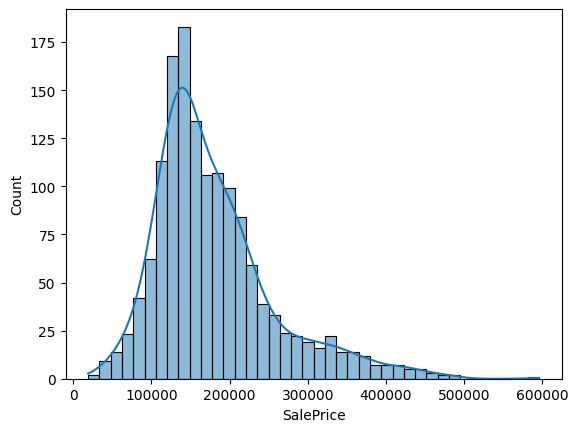

In [72]:
sns.histplot(data=res, x="SalePrice", kde = True)

In [73]:
import joblib

In [74]:
joblib.dump(pre2, "pre.joblib")

['pre.joblib']

In [75]:
joblib.dump(best_lasso, "best_model.joblib")

['best_model.joblib']

In [76]:
p = joblib.load("pre.joblib")
p

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['MSSubClass', 'LotArea', 'OverallQual',
                                  'OverallCond', 'YearBuilt', 'MasVnrArea',
                                  'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                                  'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
                                  'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
                                  'Fireplaces',...
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['LandContour', 'Utilities', 'Neighborhood',
                                  'BldgType', 'HouseStyle', 'RoofMatl',
                                  'Exterior1st', 'MasVnrType', 'ExterQual',
                                  'BsmtQual', 'BsmtCond', 'BsmtExposure',
                                  'HeatingQC', 'KitchenQual', 'Functional',
                                  'FireplaceQu', 'GarageFinish', 'GarageCond',
                                  'MiscFeature'])])

In [77]:
m = joblib.load("best_model.joblib")
m

Lasso(alpha=np.float64(92.50000000000074))